In [1]:
import pandas as pd
from datetime import datetime
df1= pd.read_csv('/kaggle/input/qefqfqa/pampa(nasa).csv')
df1

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE
0,1984,1,1,5.22,23.73,15.87,2.04,96.46,1.91
1,1984,1,2,5.04,22.29,15.08,0.20,96.51,0.92
2,1984,1,3,5.52,23.89,14.95,0.01,96.53,0.96
3,1984,1,4,5.15,23.76,15.08,0.00,96.58,1.98
4,1984,1,5,5.03,23.71,14.47,0.03,96.51,1.61
...,...,...,...,...,...,...,...,...,...
13965,2022,3,27,5.50,27.75,16.54,6.67,96.33,2.00
13966,2022,3,28,6.67,27.77,16.97,7.94,96.31,1.17
13967,2022,3,29,6.70,28.33,16.78,3.21,96.22,2.12
13968,2022,3,30,6.16,28.22,16.85,2.59,96.18,1.70


In [2]:
df1['datetime'] = pd.to_datetime(df1[['YEAR', 'MO', 'DY']].rename(columns={'YEAR':'year', 'MO':'month', 'DY':'day'}))
df1['datetime'] = df1['datetime'].dt.strftime('%d/%m/%Y')
df1 = df1.drop(['YEAR', 'MO', 'DY'], axis=1)
df1

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,datetime
0,5.22,23.73,15.87,2.04,96.46,1.91,01/01/1984
1,5.04,22.29,15.08,0.20,96.51,0.92,02/01/1984
2,5.52,23.89,14.95,0.01,96.53,0.96,03/01/1984
3,5.15,23.76,15.08,0.00,96.58,1.98,04/01/1984
4,5.03,23.71,14.47,0.03,96.51,1.61,05/01/1984
...,...,...,...,...,...,...,...
13965,5.50,27.75,16.54,6.67,96.33,2.00,27/03/2022
13966,6.67,27.77,16.97,7.94,96.31,1.17,28/03/2022
13967,6.70,28.33,16.78,3.21,96.22,2.12,29/03/2022
13968,6.16,28.22,16.85,2.59,96.18,1.70,30/03/2022


In [3]:
df2 = pd.read_csv('/kaggle/input/pampa-data/Pampa_Gauge-Discharge_Data_Malakkara1984-20171.csv', header=2,na_values='null')
df2 = df2.drop(['Observed/Computed','Data Type'],axis=1)
df2

,Day,Mean Gauge (m),Discharge (cumecs)
0,20/5/1984,1.170,NaN
1,21/5/1984,1.000,NaN
2,22/5/1984,0.970,NaN
3,23/5/1984,0.905,NaN
4,24/5/1984,0.870,NaN
...,...,...,...
12060,27/5/2017,1.210,48.831
12061,28/5/2017,0.100,NaN
12062,29/5/2017,0.080,NaN
12063,30/5/2017,1.190,35.728


merging two data set based on the common dates

In [4]:
df1['datetime'] = pd.to_datetime(df1['datetime'], format='%d/%m/%Y')
df2['Day'] = pd.to_datetime(df2['Day'], format='%d/%m/%Y')

df2 = df2.rename(columns={'Day': 'datetime'})
df2 = df2.set_index('datetime')
df1=df1.set_index('datetime')
df = pd.concat([df1, df2], axis=1, join='inner')

In [5]:
# from google.colab import files
# df.to_csv('chalakudi_combined.csv', index=True)
# files.download('chalakudi_combined.csv')

In [6]:
min(df['Discharge (cumecs)'])

nan

In [7]:
max(df['Discharge (cumecs)'])

nan

In [8]:
df.isnull().sum()

ALLSKY_SFC_SW_DWN       0
TS                      0
QV2M                    0
PRECTOTCORR             0
PS                      0
WS10M_RANGE             0
Mean Gauge (m)          0
Discharge (cumecs)    597
dtype: int64

In [9]:
# df['TS'] = df['TS'].interpolate(method='linear')
# df['T2M'] = df['T2M'].interpolate(method='linear')
# df['QV2M'] = df['QV2M'].interpolate(method='linear')
# df['PRECTOTCORR'] = df['PRECTOTCORR'].interpolate(method='linear')
# df['PS'] = df['PS'].interpolate(method='linear')
# df['WS50M_RANGE'] = df['WS50M_RANGE'].interpolate(method='linear')
df['Discharge (cumecs)'] = df['Discharge (cumecs)'].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

In [10]:
df.isnull().sum()

ALLSKY_SFC_SW_DWN     0
TS                    0
QV2M                  0
PRECTOTCORR           0
PS                    0
WS10M_RANGE           0
Mean Gauge (m)        0
Discharge (cumecs)    0
dtype: int64

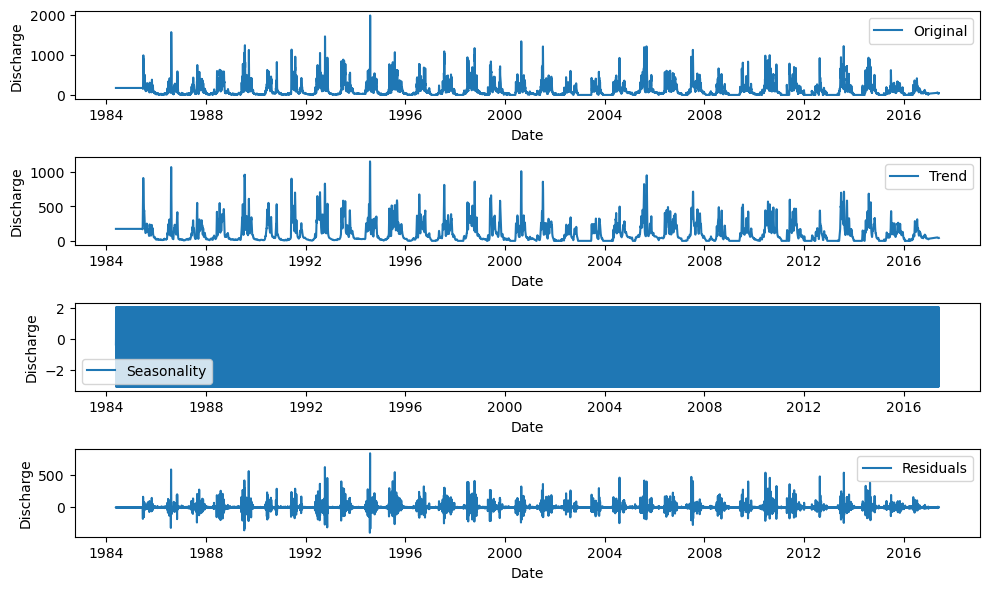

In [11]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Discharge (cumecs)'], model='additive')

trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(df['Discharge (cumecs)'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(seasonality,label='Seasonality')
plt.legend()
plt.subplot(414)
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.plot(residuals, label='Residuals')
plt.legend()
plt.tight_layout()

plt.show()

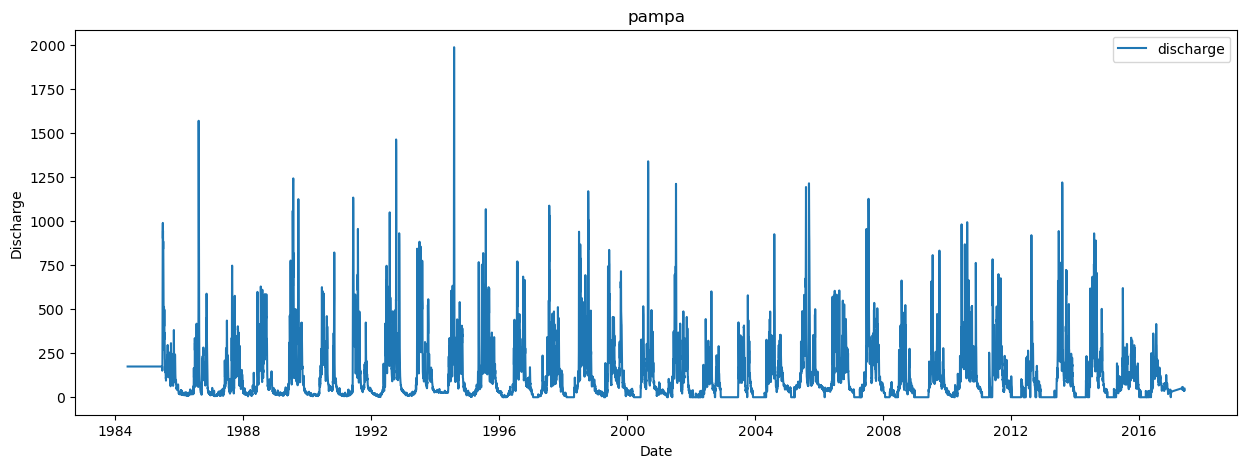

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(df['Discharge (cumecs)'],label='discharge')
plt.title("pampa")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()

In [13]:
df.corr()

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
ALLSKY_SFC_SW_DWN,1.000000,0.409407,-0.423094,-0.483565,0.256891,-0.160512,-0.455380,-0.438776
TS,0.409407,1.000000,-0.018015,-0.161378,-0.190147,0.044914,-0.381998,-0.347958
QV2M,-0.423094,-0.018015,1.000000,0.330102,-0.489838,0.020554,0.384795,0.361169
PRECTOTCORR,-0.483565,-0.161378,0.330102,1.000000,-0.261124,0.107589,0.390514,0.401728
PS,0.256891,-0.190147,-0.489838,-0.261124,1.000000,-0.171979,-0.222738,-0.226450
WS10M_RANGE,-0.160512,0.044914,0.020554,0.107589,-0.171979,1.000000,0.201416,0.198390
Mean Gauge (m),-0.455380,-0.381998,0.384795,0.390514,-0.222738,0.201416,1.000000,0.927730
Discharge (cumecs),-0.438776,-0.347958,0.361169,0.401728,-0.226450,0.198390,0.927730,1.000000


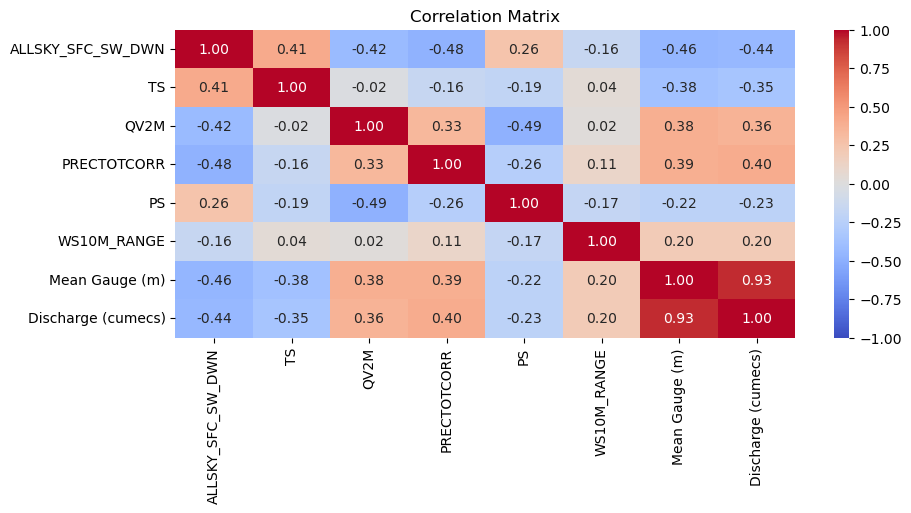

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [15]:
df

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1984-05-20,4.37,24.77,17.70,12.07,96.16,0.71,1.170,174.400000
1984-05-21,6.13,25.05,17.82,4.42,96.15,1.39,1.000,174.400000
1984-05-22,6.37,25.63,17.33,0.22,96.13,1.47,0.970,174.400000
1984-05-23,6.14,25.54,17.15,0.06,96.09,1.29,0.905,174.400000
1984-05-24,6.82,25.45,17.15,0.02,96.02,1.50,0.870,174.400000
...,...,...,...,...,...,...,...,...
2017-05-27,5.57,25.73,18.07,5.76,96.05,1.54,1.210,48.831000
2017-05-28,3.32,25.29,18.43,12.94,96.08,2.12,0.100,44.463333
2017-05-29,1.90,25.44,18.92,17.14,96.05,1.97,0.080,40.095667


splitting the data set to train and test data
train data- before 2010-01-10
test data- after 2010-01-10


In [16]:
df.index = pd.to_datetime(df.index)
cutoff_date = pd.to_datetime('2010-01-10')
train = df[df.index < cutoff_date]
test = df[df.index >= cutoff_date]
train

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
1984-05-20,4.37,24.77,17.70,12.07,96.16,0.71,1.170,174.400
1984-05-21,6.13,25.05,17.82,4.42,96.15,1.39,1.000,174.400
1984-05-22,6.37,25.63,17.33,0.22,96.13,1.47,0.970,174.400
1984-05-23,6.14,25.54,17.15,0.06,96.09,1.29,0.905,174.400
1984-05-24,6.82,25.45,17.15,0.02,96.02,1.50,0.870,174.400
...,...,...,...,...,...,...,...,...
2010-01-05,5.42,22.04,14.34,0.00,96.27,1.31,1.150,17.656
2010-01-06,5.49,22.33,12.94,0.01,96.26,1.00,1.160,18.352
2010-01-07,5.58,22.66,14.28,0.00,96.33,1.05,1.162,18.316


In [17]:
test

,ALLSKY_SFC_SW_DWN,TS,QV2M,PRECTOTCORR,PS,WS10M_RANGE,Mean Gauge (m),Discharge (cumecs)
datetime,,,,,,,,
2010-01-10,2.06,22.57,15.56,7.37,96.44,1.13,1.160,20.940000
2010-01-11,4.74,23.70,15.62,0.25,96.56,0.62,1.122,14.738000
2010-01-12,5.71,24.30,15.99,2.98,96.61,0.95,1.150,24.003000
2010-01-13,5.08,24.02,17.46,2.46,96.62,1.20,1.200,25.808000
2010-01-14,5.36,24.45,16.30,0.24,96.64,1.36,1.300,36.422000
...,...,...,...,...,...,...,...,...
2017-05-27,5.57,25.73,18.07,5.76,96.05,1.54,1.210,48.831000
2017-05-28,3.32,25.29,18.43,12.94,96.08,2.12,0.100,44.463333
2017-05-29,1.90,25.44,18.92,17.14,96.05,1.97,0.080,40.095667


In [18]:
x=test.index[0]
y=train.index[-1]
z=test.index
z

DatetimeIndex(['2010-01-10', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15', '2010-01-16', '2010-01-17',
               '2010-01-18', '2010-01-19',
               ...
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29',
               '2017-05-30', '2017-05-31'],
              dtype='datetime64[ns]', name='datetime', length=2699, freq='D')

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler=scaler.fit(df)

In [20]:
train =scaler.transform(train)
train

array([[0.56644295, 0.45388933, 0.82665696, ..., 0.09151786, 0.15239155,
        0.08772636],
       [0.80268456, 0.47634322, 0.83539694, ..., 0.24330357, 0.13348165,
        0.08772636],
       [0.83489933, 0.52285485, 0.79970867, ..., 0.26116071, 0.13014461,
        0.08772636],
       ...,
       [0.72885906, 0.28468324, 0.57756737, ..., 0.16741071, 0.15150167,
        0.00921328],
       [0.68187919, 0.3255814 , 0.64457393, ..., 0.21428571, 0.15183537,
        0.00934205],
       [0.7114094 , 0.35284683, 0.73780044, ..., 0.12723214, 0.15183537,
        0.00914537]])

In [21]:
test=scaler.transform(test)
test

array([[0.25637584, 0.27746592, 0.67079388, ..., 0.18526786, 0.1512792 ,
        0.0105332 ],
       [0.61610738, 0.3680834 , 0.67516387, ..., 0.07142857, 0.14705228,
        0.00741348],
       [0.74630872, 0.41619888, 0.70211216, ..., 0.14508929, 0.15016685,
        0.01207394],
       ...,
       [0.23489933, 0.50761828, 0.91551347, ..., 0.37276786, 0.03114572,
        0.02016885],
       [0.51006711, 0.53247795, 0.96431173, ..., 0.31696429, 0.15461624,
        0.01797183],
       [0.71946309, 0.49879711, 0.87545521, ..., 0.31919643, 0.15906563,
        0.02430181]])

defining input shape to lstm
here input shape is (14,7) past 14 days values of 7 attributes
output shape is (1,3) 3 days future values 

In [22]:
import  numpy as np
trainx=[]
trainy=[]
n_future=3
n_past=14
for i in range(n_past,len(train)-n_future+1):
  # c = np.concatenate((train[i:i+1,0:3], train[i:i+1,4:8]), axis=1)
  trainx.append(train[i-n_past:i,0:8])
  trainy.append(train[i:i+n_future,7])
trainx,trainy=np.array(trainx),np.array(trainy)

In [23]:
trainx.shape

(9350, 14, 8)

In [24]:
trainy.shape

(9350, 3)

In [25]:
import tensorflow as tf
# import tf.keras as keras
from keras.models import Sequential
from keras.layers import LSTM,GRU,Bidirectional
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns


In [26]:
model1 = Sequential()
model1.add(LSTM(units=256,activation='relu',return_sequences=False,input_shape=(n_past,8)))
# model1.add(LSTM(units=256,activation='relu',return_sequences=False))
# model1.add(LSTM(units=256,activation='relu',return_sequences=False))
# model1.add(LSTM(units=128,activation='relu',return_sequences=False))
# model1.add(LSTM(units=128,activation='relu',return_sequences=False))
# model1.add(LSTM(units=128,activation='relu',return_sequences=False))
# model1.add(LSTM(units=64,activation='relu'))
model1.add(Dense(n_future,activation='relu'))
model1.compile(optimizer='adam',loss='mse')

In [27]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               271360    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 272,131
Trainable params: 272,131
Non-trainable params: 0
_________________________________________________________________


In [28]:
model1.fit(trainx, trainy, epochs=200, batch_size=8000, validation_split=0.2, verbose=1)


Epoch 1/200
1/1 [==============================] - 5s 5s/step - loss: 0.0095 - val_loss: 0.0073
Epoch 2/200
1/1 [==============================] - 0s 102ms/step - loss: 0.0079 - val_loss: 0.0070
Epoch 3/200
1/1 [==============================] - 0s 102ms/step - loss: 0.0076 - val_loss: 0.0057
Epoch 4/200
1/1 [==============================] - 0s 99ms/step - loss: 0.0063 - val_loss: 0.0048
Epoch 5/200
1/1 [==============================] - 0s 99ms/step - loss: 0.0054 - val_loss: 0.0043
Epoch 6/200
1/1 [==============================] - 0s 96ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 7/200
1/1 [==============================] - 0s 96ms/step - loss: 0.0047 - val_loss: 0.0037
Epoch 8/200
1/1 [==============================] - 0s 99ms/step - loss: 0.0044 - val_loss: 0.0032
Epoch 9/200
1/1 [==============================] - 0s 96ms/step - loss: 0.0039 - val_loss: 0.0029
Epoch 10/200
1/1 [==============================] - 0s 97ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 11/200
1/1 [=

In [29]:
asd=model1.predict(trainx)

293/293 [==============================] - 1s 3ms/step


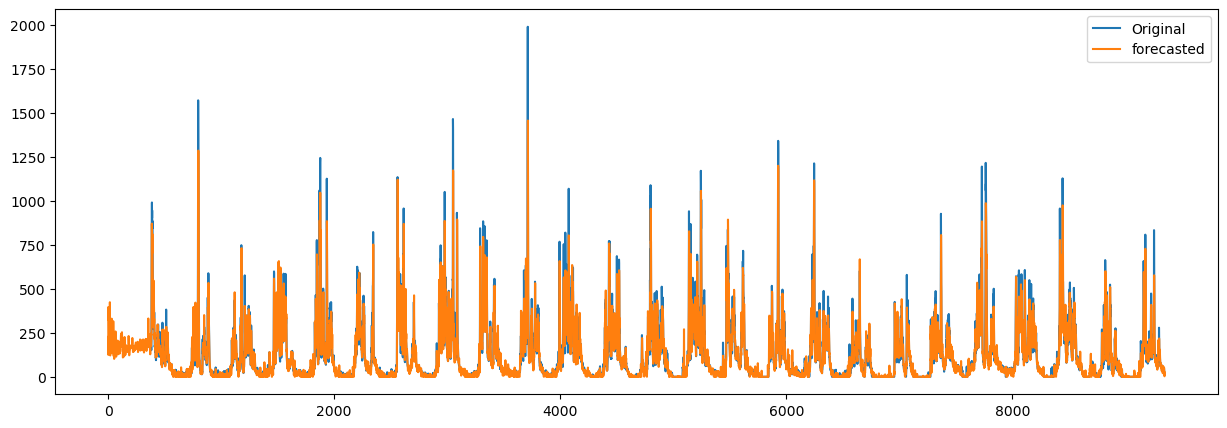

RMSE: 53.78986676772305
R-squared score: 0.89
MAD: 27.831601851635124
MAE score: 27.83


In [30]:
first_elements = [[row[0]] for row in asd]
#print(first_elements)
ppprr=np.array(first_elements)
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past:-2],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past:-2],disc))
print("RMSE:",rmse)

actual = disc_org[n_past:-2]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

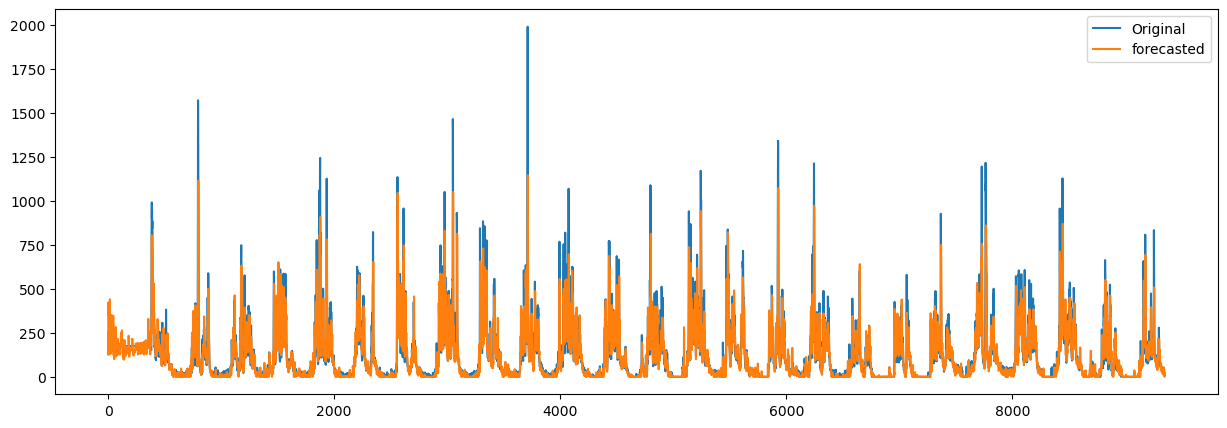

RMSE: 77.86878486179968
R-squared score: 0.77
MAD: 38.57220019608368
MAE score: 38.57


In [31]:
second_elements = [[row[1]] for row in asd]
#print(first_elements)
ppprr=np.array(second_elements )
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past+1:-1],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+1:-1],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+1:-1]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

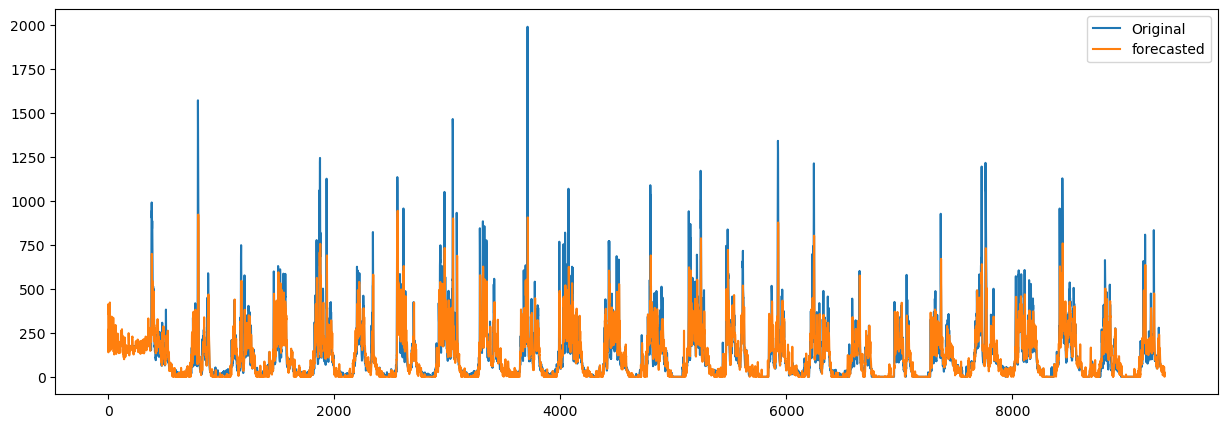

RMSE: 93.66195141668781
R-squared score: 0.66
MAD: 48.21580427990847
MAE score: 48.22


In [32]:
third_elements = [[row[2]] for row in asd]
#print(first_elements)
ppprr=np.array(third_elements )
#print(pppr.shape)
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

first_elements = [[row[7]] for row in train]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past+2:len(disc_org)],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+2:len(disc_org)],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+2:len(disc_org)]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

for testing 
input shape is (14,7) past 14 days values of 7 attributes 
output shape is (1,3) 3 days future values

In [33]:
testx=[]
testy=[]
n_future=3
n_past=14
for i in range(n_past,len(test)-n_future+1):
  # c = np.concatenate((test[i:i+1,0:3], test[i:i+1,4:8]), axis=1)
  testx.append(test[i-n_past:i,0:8])
  testy.append(test[i:i+n_future,7])
testx,testy=np.array(testx),np.array(testy)

In [34]:
testy

array([[0.00905433, 0.00671579, 0.00564889],
       [0.00671579, 0.00564889, 0.00963833],
       [0.00564889, 0.00963833, 0.00962676],
       ...,
       [0.02456288, 0.02236586, 0.02016885],
       [0.02236586, 0.02016885, 0.01797183],
       [0.02016885, 0.01797183, 0.02430181]])

In [35]:
testx.shape

(2683, 14, 8)

In [36]:
testx.shape

(2683, 14, 8)

In [37]:
fore=model1.predict(testx)

84/84 [==============================] - 0s 3ms/step


In [38]:
fore

array([[0.00314044, 0.        , 0.        ],
       [0.00493654, 0.        , 0.        ],
       [0.0023808 , 0.        , 0.        ],
       ...,
       [0.02049863, 0.01626657, 0.03112153],
       [0.02071753, 0.01808936, 0.03004518],
       [0.0262262 , 0.0245309 , 0.03982815]], dtype=float32)

fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take first col only (day1,day2,day3...)

In [39]:
first_elements = [[row[0]] for row in fore]
#print(first_elements)
ppprr=np.array(first_elements)
#print(pppr.shape)

In [40]:
import numpy as np
forcast_copies = np.repeat(ppprr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

(2683,)

In [41]:
first_elements = [[row[7]] for row in test]
#print(first_elements)
ppp=np.array(first_elements)
#print(pppr.shape)

In [42]:
org_copies = np.repeat(ppp, df.shape[1], axis=-1)
disc_org= scaler.inverse_transform(org_copies)[:,7]
disc_org.shape

(2699,)

In [43]:
# disc_org=disc_org[n_past:-2]
# disc_org.shape

In [44]:
min(disc)

0.0

In [45]:
max(disc)

997.5674

In [46]:
min(disc_org)

0.0

In [47]:
max(disc_org)

1219.978

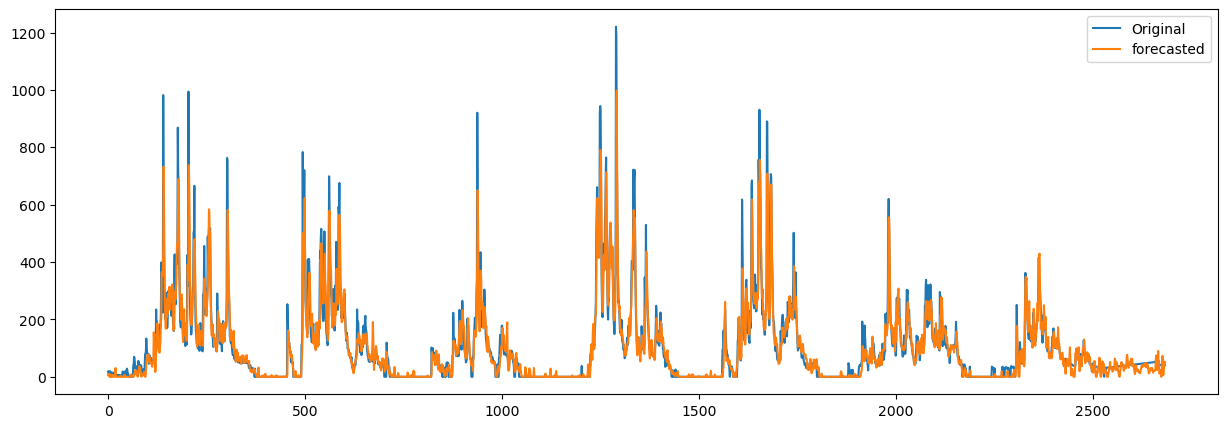

RMSE: 52.55793199007984
R-squared score: 0.86
MAD: 25.158440267024396
MAE score: 25.16


In [48]:
plt.figure(figsize=(15, 5))
plt.plot(disc_org[n_past:-2],label='Original')
plt.plot(disc,label='forecasted')

plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past:-2],disc))
print("RMSE:",rmse)

actual = disc_org[n_past:-2]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

In [49]:

forcast_period_dates=pd.date_range(x,periods=len(test),freq='1d').tolist()
forcast_dates=[]
for time in forcast_period_dates:
    forcast_dates.append(time.date())
print(forcast_dates[0])
print(len(forcast_dates))
forcast_dates[-1]

2010-01-10
2699


datetime.date(2017, 5, 31)

In [50]:

dt_forcast = np.column_stack((forcast_dates[n_past:-2], disc))
dt_forcast = pd.DataFrame(dt_forcast, columns=['Date', 'discharge'])
dt_forcast['Date'] = pd.to_datetime(dt_forcast['Date'])
dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize(None) # remove any timezone information
# dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize('UTC') # set timezone to UTC

dt_forcast = dt_forcast.set_index('Date')


orginal = disc_org[n_past:-2]
dt = np.column_stack((forcast_dates[n_past:-2], orginal))
dt = pd.DataFrame(dt, columns=['Date', 'discharge'])
dt['Date'] = pd.to_datetime(dt['Date'])
dt['Date'] = dt['Date'].dt.tz_localize(None) # remove any timezone information
# dt_forcast['Date'] = dt_forcast['Date'].dt.tz_localize('UTC') # set timezone to UTC


dt = dt.set_index('Date')
dt_forcast


,discharge
Date,
2010-01-24,6.243192
2010-01-25,9.813836
2010-01-26,4.733034
2010-01-27,1.958163
2010-01-28,0.0
...,...
2017-05-25,5.781643
2017-05-26,16.869186
2017-05-27,40.751282


In [51]:
dt

,discharge
Date,
2010-01-24,18.0
2010-01-25,13.351
2010-01-26,11.23
2010-01-27,19.161
2010-01-28,19.138
...,...
2017-05-25,37.206308
2017-05-26,36.625
2017-05-27,48.831


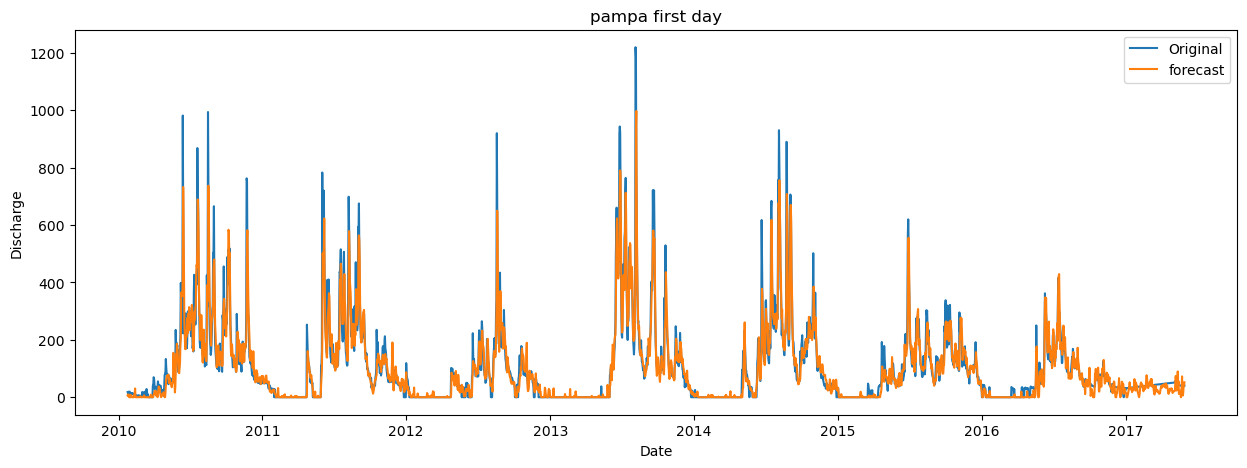

In [52]:
plt.figure(figsize=(15, 5))
plt.plot(dt.index, dt, label='Original')
plt.plot(dt_forcast.index, dt_forcast['discharge'], label='forecast')
plt.legend()
plt.title("pampa first day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.show()

In [53]:
dt['discharge'][-10:-1]

Date
2017-05-20    40.112846
2017-05-21    39.531538
2017-05-22    38.950231
2017-05-23    38.368923
2017-05-24    37.787615
2017-05-25    37.206308
2017-05-26       36.625
2017-05-27       48.831
2017-05-28    44.463333
Name: discharge, dtype: object

In [54]:
disc_org[-10:-1]

array([38.95023077, 38.36892308, 37.78761538, 37.20630769, 36.625     ,
       48.831     , 44.46333333, 40.09566667, 35.728     ])

In [55]:
dt_forcast['discharge'][:10]

Date
2010-01-24    6.243192
2010-01-25    9.813836
2010-01-26    4.733034
2010-01-27    1.958163
2010-01-28         0.0
2010-01-29     8.46086
2010-01-30         0.0
2010-01-31         0.0
2010-02-01         0.0
2010-02-02    6.894984
Name: discharge, dtype: object

In [56]:
disc[:10]

array([6.243192, 9.813836, 4.733034, 1.958163, 0.      , 8.46086 ,
       0.      , 0.      , 0.      , 6.894984], dtype=float32)

In [57]:
dt_forcast['discharge'][-10:-1]

Date
2017-05-20          0.0
2017-05-21    16.461779
2017-05-22    38.190674
2017-05-23    72.686363
2017-05-24    19.666876
2017-05-25     5.781643
2017-05-26    16.869186
2017-05-27    40.751282
2017-05-28    41.186455
Name: discharge, dtype: object

In [58]:
disc[-10:-1]

array([ 0.       , 16.461779 , 38.190674 , 72.68636  , 19.666876 ,
        5.7816434, 16.869186 , 40.75128  , 41.186455 ], dtype=float32)

In [59]:
rmse = sqrt(mean_squared_error(dt_forcast['discharge'],dt['discharge']))
print("RMSE:",rmse)
from sklearn.metrics import mean_squared_error, r2_score
import math
actual = disc_org[n_past:-2]
forecast = disc
r2 = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2))


RMSE: 52.55793199007984
R-squared score: 0.86


fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take second col only (day2,day3,day4...)

In [60]:
second_elements = [[row[1]] for row in fore]
# print(second_elements)
pppr=np.array(second_elements)
# print(pppr.shape)


In [61]:
import numpy as np
forcast_copies = np.repeat(pppr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape

(2683,)

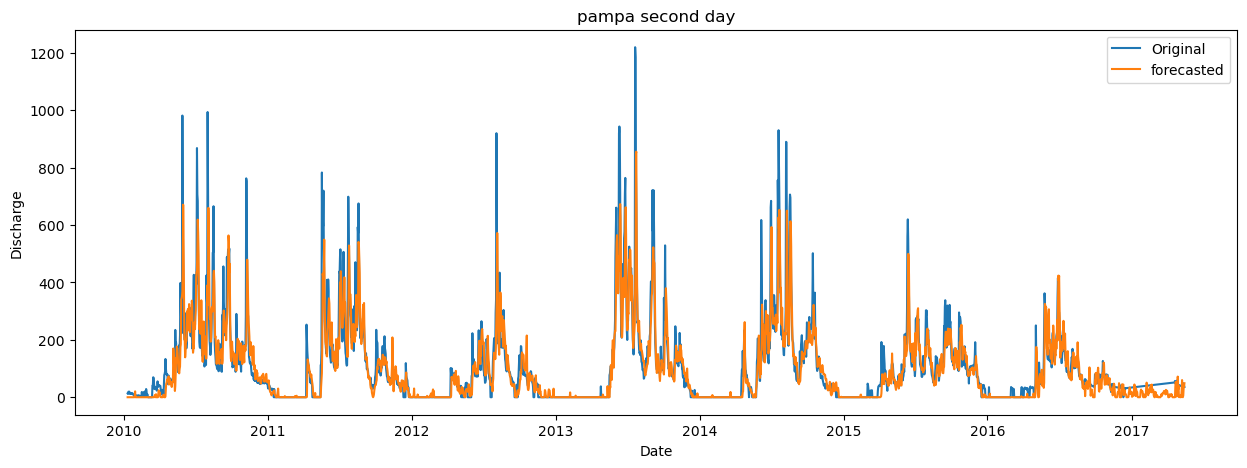

RMSE: 72.03091901445427
R-squared score: 0.75
MAD: 35.22262764710851
MAE score: 35.22


In [62]:
import datetime
dates = [datetime.datetime(2010, 1, 10) + datetime.timedelta(days=i) for i in range(len(disc_org[n_past+1:-1]))]

plt.figure(figsize=(15, 5))
plt.plot(dates,disc_org[n_past+1:-1],label='Original')
plt.plot(dates,disc,label='forecasted')
plt.title("pampa second day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+1:-1],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+1:-1]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

fore contains repation of days([day1,day2,day3],[day2,day3,day4],[day3,day4,day5])
so we take first col only (day3,day4,day5...)

In [63]:
third_elements = [[row[2]] for row in fore]
#print(third_elements)
pppr=np.array(third_elements)
# print(pppr.shape)


In [64]:
import numpy as np
forcast_copies = np.repeat(pppr, df.shape[1], axis=-1)
disc = scaler.inverse_transform(forcast_copies)[:,7]
disc.shape


(2683,)

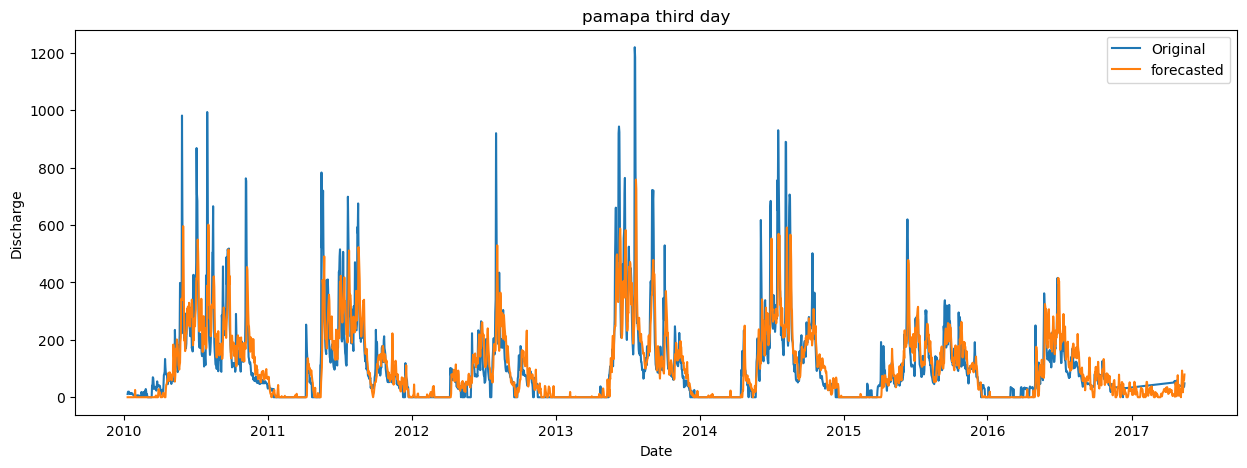

RMSE: 85.51843743935154
R-squared score: 0.64
MAD: 44.52700434301243
MAE score: 44.53


In [65]:
import datetime
dates = [datetime.datetime(2010, 1, 10) + datetime.timedelta(days=i) for i in range(len(disc_org[n_past+2:len(disc_org)]))]

plt.figure(figsize=(15, 5))
plt.plot(dates,disc_org[n_past+2:len(disc_org)],label='Original')
plt.plot(dates,disc,label='forecasted')
plt.title("pamapa third day")
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(disc_org[n_past+2:len(disc_org)],disc))
print("RMSE:",rmse)

actual = disc_org[n_past+2:len(disc_org)]
forecast = disc 

# mape = np.mean(np.abs((actual - actual) / actual)) * 100
# print('MAPE:', mape)

from sklearn.metrics import r2_score


r2_score = r2_score(actual, forecast)
print("R-squared score: {:.2f}".format(r2_score))

mad = np.mean(np.abs(actual - forecast))
print('MAD:', mad)

from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, forecast)
print("MAE score: {:.2f}".format(mae_score))

In [66]:
# model1.save('final_pampa_lstm.h5')

In [67]:
#!pip install kaggle


# 